In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm

In [93]:
f=pd.read_csv('Data_mar.csv',low_memory=False)
test=pd.read_csv('postpaid_churn_prediction_m202209_forward_1.csv')
# f=f.fillna('NULL')
# test=pd.read_csv('postpaid_churn_pred_202211_1.csv')
test2=pd.read_csv('postpaid_churn_prediction_m202209_1.csv')

In [94]:
remove=[
'non_cmhk_opt_out_sts',
'is_auto_renewal',
'voc_opt_out_sts',
'dnc_vod_opt_out_sts',
'surv_opt_out_sts',
'dnc_sms_opt_out_sts',
'sms_opt_out_sts',
'eml_opt_out_sts',
'tes_opt_out_sts',
'是否离网']

vaildset=['is_auto_renewal',
 'auto_ext_ind',
 'non_cmhk_opt_out_sts',
 'non_cmhk_opt_out',
 'sms_opt_out_sts',
 'is_auto_renewal',
 ]

vaildset2=['is_auto_renewal','spl_hdl_lst_ind',
'sms_opt_out_sts',
'eml_opt_out_sts',
'tes_opt_out_sts',
'is_auto_renewal',
'voc_opt_out_sts',
 'w_grp_ind',
 'is_auto_renewal',
 'wth_mlti_sim',
 '是否携号入网',
 '是否第一张合约届满',
 '是否自动续约',
 'auto_ext_ind',
 ]

In [95]:
# ww = pd.merge(test.iloc[:,:-1], test2[["user_id",'是否离网']], how="inner", on=["user_id"]).sort_values(by='是否离网').set_index('user_id').sort_index()
# ww2 = pd.merge(test2, test[["user_id"]], how="inner", on=["user_id"]).sort_values(by='是否离网').set_index('user_id').sort_index()

In [96]:
# ww=ww.sort_values(by='是否离网', ascending=False)
# ww2=ww2.sort_values(by='是否离网', ascending=False)

In [97]:
retest = pd.merge(test.iloc[:,:-1], test2[["user_id",'是否离网']], how="inner", on=["user_id"])

In [98]:
len(retest[retest['是否离网']=='Y'])/len(retest)

0.1773901347753287

In [157]:
N_0_count=[]
N_0_Tot=0
# temp=(f[f['是否离网']=='N']).drop(['离网日期','是否离网'],axis=1)
temp=(retest[(retest['是否离网']=='N')]).drop(['是否离网'],axis=1)
for x in temp.columns:
    # if x not in remove and (set(temp[x].unique())=={'Y','N'} or set(temp[x].unique())=={'Y','N','NULL'} or set(temp[x].unique())=={'NULL','N'}):
    # if x in vaildset:
        N_0_Tot+=len(temp[temp[x]=='N'])
        N_0_count.append([x,len(temp[temp[x]=='N'])])

In [158]:
Y_0_count=[]
Y_0_Tot=0
# temp=(f[f['是否离网']=='Y']).drop(['离网日期','是否离网'],axis=1)
temp=(retest[(retest['是否离网']=='Y')]).drop(['是否离网'],axis=1)
for x in temp.columns:
    # if x not in remove and set(temp[x].unique())=={'Y','N'} or set(temp[x].unique())=={'Y','N','NULL'}:
    # if x in vaildset:
        Y_0_Tot+=len(temp[temp[x]=='N'])
        Y_0_count.append([x,len(temp[temp[x]=='N'])])

In [159]:
Y_0_df=pd.DataFrame(Y_0_count).set_index(0).sort_index()
N_0_df=pd.DataFrame(N_0_count).set_index(0).sort_index()

(<AxesSubplot: xlabel='0'>, <AxesSubplot: xlabel='0'>)

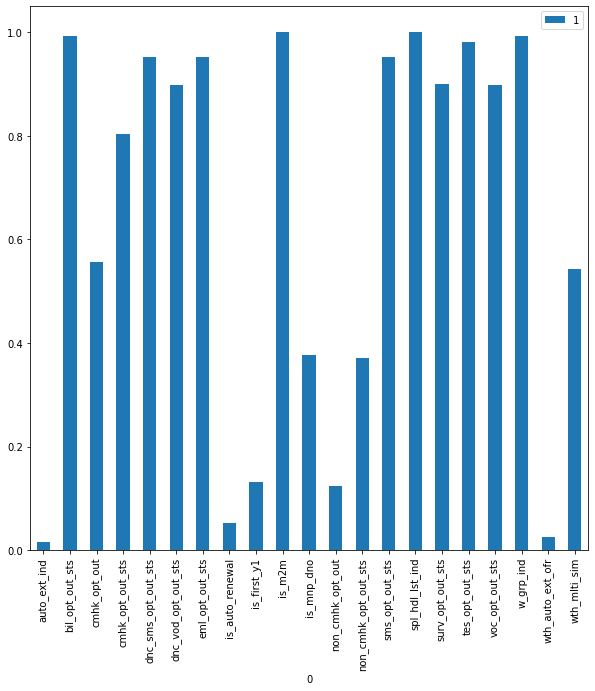

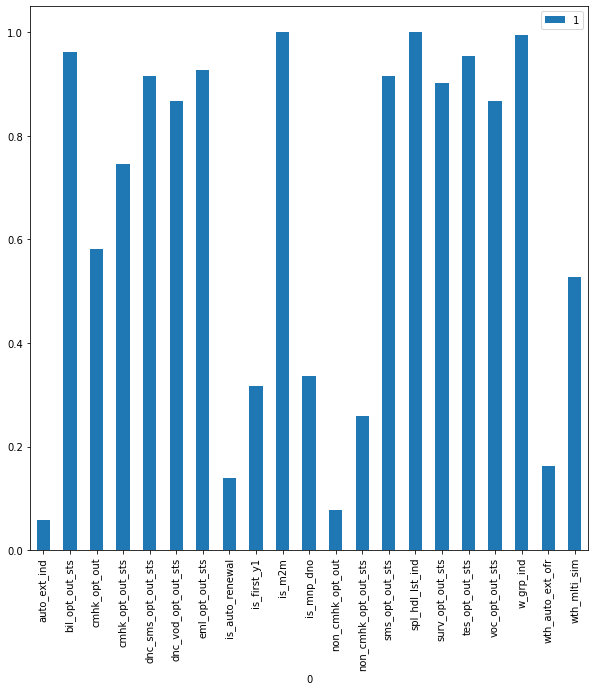

In [160]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df[N_0_df[1]!=0]/len(retest[(retest['是否离网']=='N')])).plot.bar(), (Y_0_df[Y_0_df[1]!=0]/len(retest[(retest['是否离网']=='Y')])).plot.bar()

# (N_0_df[N_0_df[1]!=0]/N_0_Tot).plot.bar(), (Y_0_df[Y_0_df[1]!=0]/Y_0_Tot).plot.bar()

<AxesSubplot: xlabel='0'>

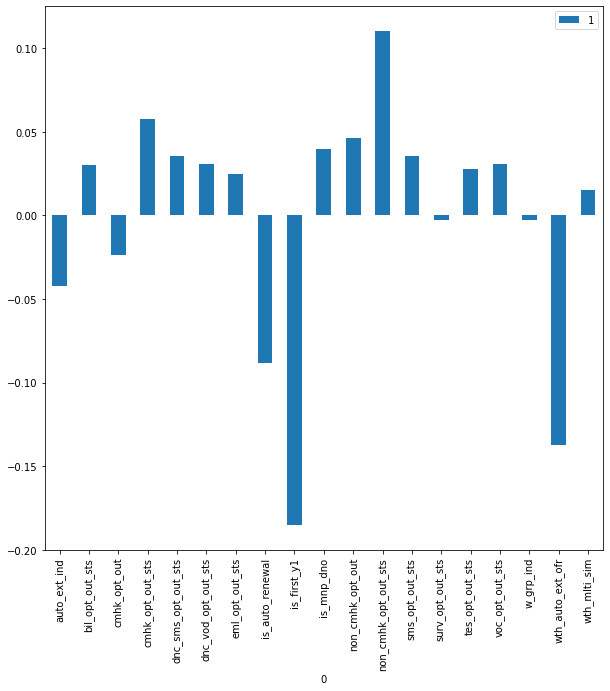

In [162]:
# t=(N_0_df/N_0_Tot-Y_0_df/Y_0_Tot)
t=(N_0_df/len(retest[retest['是否离网']=='N'])-Y_0_df/len(retest[retest['是否离网']=='Y']))
# t=(N_0_df[N_0_df[1]!=0]/len(retest[(retest['是否离网']=='N')&(retest['is_auto_renewal']=='N')]))- (Y_0_df[Y_0_df[1]!=0]/len(retest[(retest['是否离网']=='Y')&(retest['is_auto_renewal']=='N')]))

plt.rcParams["figure.figsize"] = [10, 10]
(t[t[1]!=0]).plot.bar()

In [189]:
# df_col=['is_m2m',
#  'spl_hdl_lst_ind',
#  'w_grp_ind',
#  'is_auto_renewal',
#  'wth_mlti_sim',
#  'is_auto_renewal',
#  'non_cmhk_opt_out',
#  'auto_ext_ind',
#  'non_cmhk_opt_out_sts',
#  'is_auto_renewal',
#  'dnc_vod_opt_out_sts',
#  'voc_opt_out_sts',
#  'surv_opt_out_sts',
#  'dnc_sms_opt_out_sts',
#  'sms_opt_out_sts',
#  'eml_opt_out_sts',
#  'tes_opt_out_sts',
#  'is_auto_renewal']

In [60]:
rand_mtx= np.subtract.outer((N_0_df/N_0_Tot)[1].to_numpy(),(Y_0_df/Y_0_Tot)[1].to_numpy())

In [61]:
rand_mtx

array([[-3.14042205e-03, -7.00169964e-02, -4.17596114e-02,
        -5.39418876e-02, -6.66107678e-02, -6.29469254e-02,
        -6.74637562e-02, -9.15141358e-03, -2.22954484e-02,
        -7.27877772e-02, -2.36751141e-02, -4.54298674e-03,
        -1.80247820e-02, -6.66107678e-02, -7.27877772e-02,
        -6.55631379e-02, -6.93929982e-02,  1.20466611e-03,
        -6.29469254e-02, -7.24099435e-02, -1.08516655e-02,
        -3.77809075e-02],
       [ 6.91062185e-02,  2.22964421e-03,  3.04870291e-02,
         1.83047530e-02,  5.63587274e-03,  9.29971520e-03,
         4.78288442e-03,  6.30952270e-02,  4.99511922e-02,
        -5.41136645e-04,  4.85715265e-02,  6.77036538e-02,
         5.42218585e-02,  5.63587274e-03, -5.41136645e-04,
         6.68350270e-03,  2.85364238e-03,  7.34513067e-02,
         9.29971520e-03, -1.63302892e-04,  6.13949751e-02,
         3.44657331e-02],
       [ 3.68456058e-02, -3.00309685e-02, -1.77358358e-03,
        -1.39558597e-02, -2.66247400e-02, -2.29608975e-02,
    

In [141]:
dec_mtx=t[(t[1]!=0)].sort_values(by=1).to_numpy()
dec_mtx=dec_mtx.reshape(1,dec_mtx.shape[0])[0]

In [142]:
df_col=t[t[1]!=0].sort_values(by=1).index.tolist()

In [78]:
df_col=N_0_df.index.tolist()

In [143]:
df_col

['wth_auto_ext_ofr',
 'surv_opt_out_sts',
 'auto_ext_ind',
 'is_mnp_dno',
 'w_grp_ind',
 'dnc_vod_opt_out_sts',
 'voc_opt_out_sts',
 'eml_opt_out_sts',
 'tes_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'wth_mlti_sim',
 'bil_opt_out_sts',
 'cmhk_opt_out',
 'is_first_y1',
 'non_cmhk_opt_out',
 'cmhk_opt_out_sts',
 'non_cmhk_opt_out_sts']

In [193]:
(pd.DataFrame(df_col,columns=['Features']).join(pd.DataFrame(dec_mtx,columns=['MTXvalue']))).to_csv('featureMTXvalue.csv', encoding='utf-8-sig',index=False)

In [144]:
_0_count_test=[]
# tt=test.drop(['离网日期'],axis=1)
tt=retest
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N'and row['is_auto_renewal']=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [145]:
test_array=np.array(_0_count_test)

In [64]:
np.sum(rand_mtx.dot(test_array[0]))

0.011838790931989723

In [150]:
y_pred=[]
tor=[]
for x in test_array:
    churn=np.sum(dec_mtx.dot(x))
    tor.append(churn)
    # if churn<=-0.31118400913770394:
    # if churn <=-0.315816:
    # if churn <=0.717172	:
    if churn <=-0.7:
    # if churn <=-0.43651473609291813:
    # if churn <=-0.409091:
        y_pred.append(-1)
    else:
        y_pred.append(1)
y_pred=np.array(y_pred)

In [196]:
# pointwise=np.linspace(0,-0.5,num=100)
# pointwise
pointwise=np.linspace(-0.6,0.6,num=100)
pointwise

array([-0.6       , -0.58787879, -0.57575758, -0.56363636, -0.55151515,
       -0.53939394, -0.52727273, -0.51515152, -0.5030303 , -0.49090909,
       -0.47878788, -0.46666667, -0.45454545, -0.44242424, -0.43030303,
       -0.41818182, -0.40606061, -0.39393939, -0.38181818, -0.36969697,
       -0.35757576, -0.34545455, -0.33333333, -0.32121212, -0.30909091,
       -0.2969697 , -0.28484848, -0.27272727, -0.26060606, -0.24848485,
       -0.23636364, -0.22424242, -0.21212121, -0.2       , -0.18787879,
       -0.17575758, -0.16363636, -0.15151515, -0.13939394, -0.12727273,
       -0.11515152, -0.1030303 , -0.09090909, -0.07878788, -0.06666667,
       -0.05454545, -0.04242424, -0.03030303, -0.01818182, -0.00606061,
        0.00606061,  0.01818182,  0.03030303,  0.04242424,  0.05454545,
        0.06666667,  0.07878788,  0.09090909,  0.1030303 ,  0.11515152,
        0.12727273,  0.13939394,  0.15151515,  0.16363636,  0.17575758,
        0.18787879,  0.2       ,  0.21212121,  0.22424242,  0.23

----------------------------------experiment---------

In [236]:
N_0_count2=[]
N_0_Tot2=0
# temp=(f[f['是否离网']=='N']).drop(['离网日期','是否离网'],axis=1)
temp=(retest[retest['是否离网']=='N']).drop(['是否离网'],axis=1)
for x in temp.columns:
    # if x not in remove and (set(temp[x].unique())=={'Y','N'} or set(temp[x].unique())=={'Y','N','NULL'} or set(temp[x].unique())=={'NULL','N'}):
    # if x in vaildset:
        N_0_Tot2+=len(temp[temp[x]=='N'])
        N_0_count2.append([x,len(temp[temp[x]=='Y'])])

In [237]:
Y_0_count2=[]
Y_0_Tot2=0
# temp=(f[f['是否离网']=='Y']).drop(['离网日期','是否离网'],axis=1)
temp=(retest[retest['是否离网']=='Y']).drop(['是否离网'],axis=1)
for x in temp.columns:
    # if x not in remove and set(temp[x].unique())=={'Y','N'} or set(temp[x].unique())=={'Y','N','NULL'}:
    # if x in vaildset:
        Y_0_Tot2+=len(temp[temp[x]=='N'])
        Y_0_count2.append([x,len(temp[temp[x]=='N'])])

In [258]:
Y_0_df2=pd.DataFrame(Y_0_count2).set_index(0).sort_index()
N_0_df2=pd.DataFrame(N_0_count2).set_index(0).sort_index()
t2=-(N_0_df2/len(retest[retest['是否离网']=='N'])+Y_0_df2/len(retest[retest['是否离网']=='Y']))


In [369]:
_0_count_test_2=[]
# tt=test.drop(['离网日期'],axis=1)
tt=retest
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test_2.append(temp)
test_array_2=np.array(_0_count_test_2)

In [263]:
dec_mtx_2=t2[(t2[1]!=0)].sort_values(by=1).to_numpy()
dec_mtx_2=dec_mtx_2.reshape(1,dec_mtx_2.shape[0])[0]
dec_mtx_2

array([-1.79238233, -1.77085989, -1.69777436, -1.42565369, -1.36986354,
       -1.34751036, -1.18272971, -0.98099774, -0.44816061, -0.44256148,
       -0.19810196, -0.19810196, -0.16622456, -0.09571701, -0.09571701,
       -0.08759713, -0.03366615, -0.01431386, -0.01429978, -0.00004564])

In [264]:
a=pd.get_dummies(retest['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [265]:
y_pred=[]
plot_point=[]
tor=[]
for i in range(len(test_array)):
    churn=[dec_mtx.dot(test_array[i]),dec_mtx_2.dot(test_array_2[i]),y_test['是否离网'].iloc[i]]
    plot_point.append(churn)

In [267]:
plot_point_df=pd.DataFrame(plot_point)
plot_point_df[plot_point_df[2]==1]

,0,1,2
0,0.360282,-8.328000,1
1,0.336715,-6.782387,1
2,0.340738,-6.884772,1
3,0.009430,-3.490333,1
4,0.380970,-8.129898,1
...,...,...,...
80086,0.007317,-4.381055,1
80087,0.336715,-6.782387,1
80088,0.361426,-6.686670,1
80089,0.361426,-6.686670,1


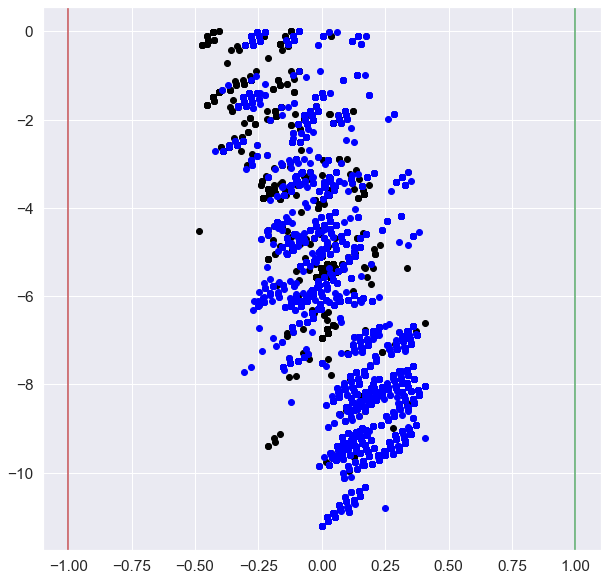

In [268]:
plt.plot(plot_point_df[plot_point_df[2]==-1][0], plot_point_df[plot_point_df[2]==-1][1], 'o', color='black')
plt.plot(plot_point_df[plot_point_df[2]==1][0], plot_point_df[plot_point_df[2]==1][1], 'o', color='blue')
plt.axvline(x=-1,color='r',label='axvline - full height')
plt.axvline(x=1,color='g',label='axvline - full height')

In [293]:
_one_code=[]
# tt=test.drop(['离网日期'],axis=1)
tt=retest
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='Y':
            temp.append(1)
        else:
            temp.append(0)
    _one_code.append(sum(val*(2**idx) for idx, val in enumerate(reversed(temp))))
array_one_code=np.array(_one_code)

In [297]:
sor=pd.DataFrame(array_one_code).join(y_test['是否离网'])

In [305]:
N_code=sor[sor['是否离网']==1][0].to_numpy()
Y_code=sor[sor['是否离网']==-1][0].to_numpy()

-----------------experiment

In [149]:
y_pred=[]
tor=[]
for x in test_array_2:
    churn=dec_mtx.dot(x)
    tor.append(churn)
    # if churn<=-0.31118400913770394:
    # if churn <=-0.315816:
    # if churn <=0.717172	:
    if churn <=-0.7:
    # if churn <=-0.43651473609291813:
    # if churn <=-0.409091:
        y_pred.append(-1)
    else:
        y_pred.append(1)
y_pred=np.array(y_pred)

NameError: name 'test_array_2' is not defined

In [380]:
sum(y_pred==-1),y_pred.size

(15220, 72862)

In [199]:
len(tor)*0.177

14176.107

In [200]:
np.sort(tor)[12896]

0.053684821845163114

In [147]:
outcome=pd.DataFrame(tor,columns=['outcome'])

<ipython-input-148-9aa97c6f2a0a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(outcome['outcome'], hist=True, kde=False,


Text(0, 0.5, 'cumulative')

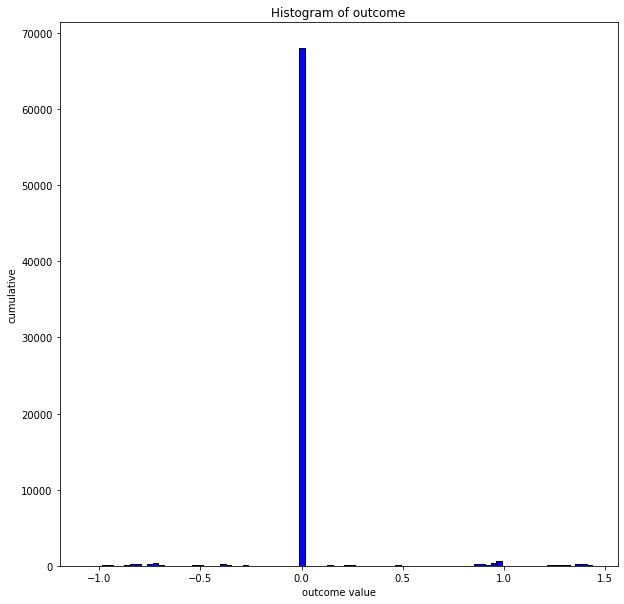

In [148]:
# matplotlib histogram
plt.hist(outcome['outcome'], color = 'blue', edgecolor = 'black',
         bins = int(180/2))

# seaborn histogram
sn.distplot(outcome['outcome'], hist=True, kde=False, 
             bins=int(180/2), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of outcome')
plt.xlabel('outcome value')
plt.ylabel('cumulative')

In [54]:
a=pd.get_dummies(retest['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [381]:
val=y_pred-y_test['是否离网'].to_numpy()
len(np.nonzero(val)[0])

22901

In [382]:
sum(y_test['是否离网'].to_numpy()==-1)

12925

In [383]:
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

68.56935027860888

In [384]:
recallval=sum(y_pred[y_test[(y_test['是否离网']==-1)].index.to_list()]==-1)/y_pred[y_test[(y_test['是否离网']==-1)].index.to_list()].size
recallval*100

20.286266924564796

In [385]:
precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)
precval*100

17.227332457293034

In [386]:
2*recallval*precval/(recallval+precval)*100

18.63208385148339

In [387]:
conf_list=[0,0,0,0]
for i in range(len(y_pred)):
    if y_test['是否离网'].to_numpy()[i]==-1:
        if val[i]==0:
            conf_list[0]+=1
        else:
            conf_list[1]+=1
    else:
        if val[i]==0:
            conf_list[3]+=1
        else:
            conf_list[2]+=1
np.set_printoptions(suppress=True)
conf_mrtx=np.array(conf_list)

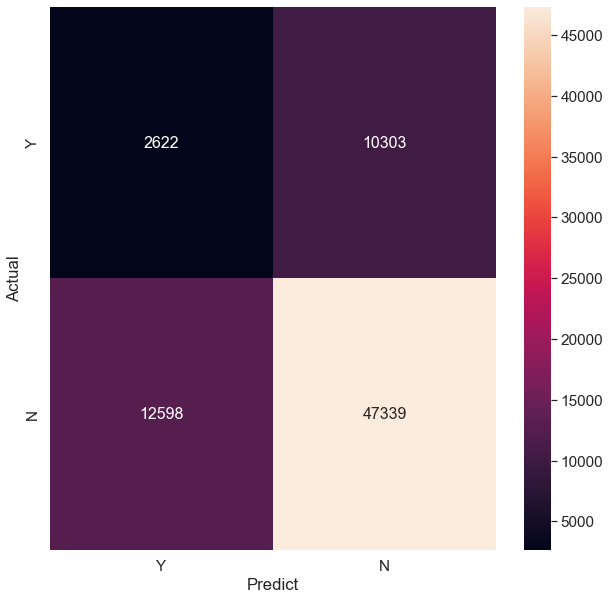

In [388]:
df_cm = pd.DataFrame(conf_mrtx.reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
plt.xlabel('Predict')
plt.ylabel('Actual')
sn.set(font_scale=1.4) # for label size


plt.show()

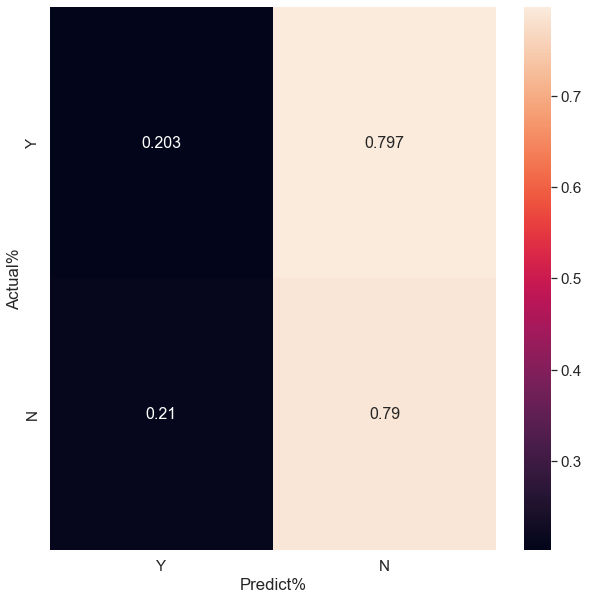

In [389]:
conf_prec=[conf_list[0]/sum(conf_list[0:2]),conf_list[1]/sum(conf_list[0:2]),conf_list[2]/sum(conf_list[2:]),conf_list[3]/sum(conf_list[2:])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size

In [163]:
# from sklearn import svm
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [164]:
# # clf = svm.NuSVC(kernel='sigmoid',nu=0.01)
# clf = svm.NuSVC(kernel='rbf',nu=0.01)
# # clf = svm.SVC(kernel='linear')

In [165]:
# clf.fit(np.array(tor).reshape(-1, 1), y_test['是否离网'].to_numpy())

In [166]:
# y_pred = clf.predict(np.array(np.array(tor).reshape(-1, 1)))
# val=y_pred-y_test['是否离网'].to_numpy()
# (len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

In [167]:
# cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
# disp.plot()
# plt.show()

In [168]:
# clf.coef_[0]

In [169]:
combin=[]
count=0
for cut in pointwise:
    y_pred=[]
    tor=[]
    for x in test_array:
        churn=dec_mtx.dot(x)
        tor.append(churn)
        if churn>cut:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    count+=1
    print(count)
    y_pred=np.array(y_pred)
    # val=y_pred-y_test['是否离网'].to_numpy()
    precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)
    recallval=sum(y_pred[y_test[(y_test['是否离网']==-1)].index.to_list()]==-1)/y_pred[y_test[(y_test['是否离网']==-1)].index.to_list()].size
    accur=(2*precval*recallval)/(precval+recallval)*100
    accur=recallval
    # accur=sum(y_pred[y_test[(y_test['是否离网']==1)].index.to_list()]==1)/len(y_pred[y_test[(y_test['是否离网']==1)].index.to_list()])
    # accur=(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100
    combin.append([cut,accur])

1


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


2
3


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)
<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


4


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


5


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


6


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


7


<ipython-input-169-c70483673a1f>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==-1)[0]]==-1)/sum(y_pred==-1)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [170]:
combin2=[]
count=0
for cut in pointwise:
    y_pred=[]
    tor=[]
    for x in test_array:
        churn=dec_mtx.dot(x)
        tor.append(churn)
        if churn>cut:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    count+=1
    print(count)
    y_pred=np.array(y_pred)
    # val=y_pred-y_test['是否离网'].to_numpy()
    precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)
    recallval=sum(y_pred[y_test[(y_test['是否离网']==1)].index.to_list()]==1)/y_pred[y_test[(y_test['是否离网']==1)].index.to_list()].size
    accur=(2*precval*recallval)/(precval+recallval)*100
    accur=recallval
    # accur=sum(y_pred[y_test[(y_test['是否离网']==1)].index.to_list()]==1)/len(y_pred[y_test[(y_test['是否离网']==1)].index.to_list()])
    # accur=(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100
    combin2.append([cut,accur])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


71


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


72


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


73


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


74


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


75


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


76


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


77


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


78


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


79


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


80


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


81


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


82


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


83


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


84


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


85


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


86


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


87


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


88


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


89


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


90


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


91


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


92


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


93


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


94


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


95


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


96


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


97


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


98


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


99


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


100


<ipython-input-170-f8e4d5b71989>:17: RuntimeWarning: invalid value encountered in long_scalars
  precval=sum(y_test['是否离网'].to_numpy()[np.where(y_pred==1)[0]]==1)/sum(y_pred==1)


<AxesSubplot: xlabel='0'>

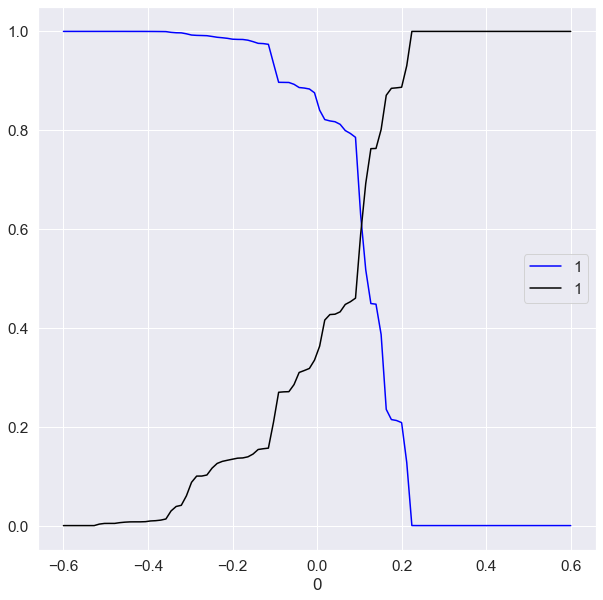

In [171]:
cut_off_accur=pd.DataFrame(combin).set_index(0)
cut_off_accur2=pd.DataFrame(combin2).set_index(0)
plt.rcParams["figure.figsize"] = [10, 10]
ax=cut_off_accur2.plot.line(color='blue')
cut_off_accur.plot.line(ax=ax, color='black')

In [172]:
cut_off_accur[cut_off_accur[1]==np.max(cut_off_accur[1])]

,1
0,
0.224242,1.0
0.236364,1.0
0.248485,1.0
0.260606,1.0
0.272727,1.0
0.284848,1.0
0.296970,1.0
0.309091,1.0
0.321212,1.0


0.466667	91.930685
0.478788	91.930685
0.490909	91.930685
0.503030	91.930685
0.515152	91.930685
0.527273	91.930685
0.539394	91.930685
0.551515	91.930685
0.563636	91.930685
0.575758	91.930685
0.587879	91.930685
0.600000	91.930685

0.080808	99.694602
0.161616	99.694602
0.242424	99.694602
0.323232	99.694602
0.404040	99.694602
0.484848	99.694602
0.565657	99.694602
0.646465	99.694602
0.727273	99.694602
0.808081	99.694602

-0.419192
-0.414141
-0.419192
-0.414141
-0.409091
-0.419192
-0.287879

In [173]:
(-0.318318+-0.319319)/2

-0.3188185

In [174]:
np.array(tor)*13.17077795

array([ 2.8663111 ,  1.89247825,  2.86676916, ...,  2.80100221,
       -2.08784089,  0.50653419])

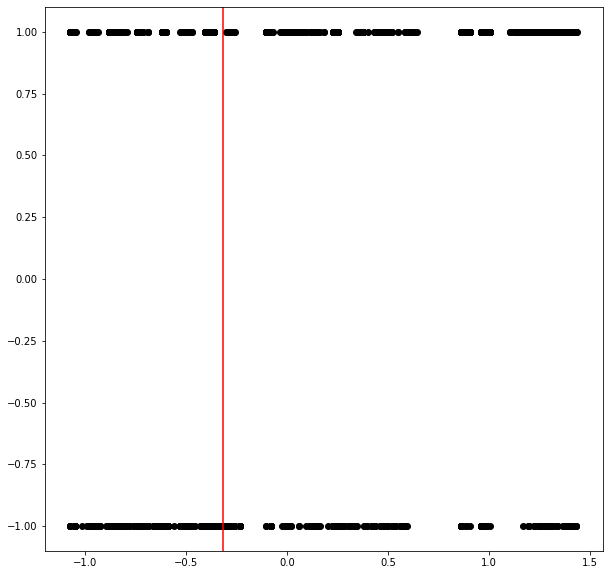

In [151]:
ax=plt.plot(np.array(tor), y_test['是否离网'].to_numpy(), 'o', color='black')
plt.axvline(x=-0.315816,color='r',label='axvline - full height')

In [176]:
# id=np.where(y_test['是否离网'].to_numpy()==1)[0].tolist()
# false_id=np.where(y_pred[id]!=y_test['是否离网'].to_numpy()[id])
# test_array[false_id][0]